In [105]:
# library to use GAM
library(mgcv)

In [106]:
# example of train data having 2 inputs
set.seed(123)                           # for reproducibility
n <- 100                                # number of data point
x1 <- runif(n, -1, 1)                   # input 1
x2 <- runif(n, -1, 1)                   # input 2
y  <- x1**4 + x2**2 + rnorm(n, 0, 0.1)  # output

In [107]:
# Hyper parameters, the bigger number of knots is, the more complex model is.
k1 <- 20 # Number of knots for input 1
k2 <- 30 # Number of knots for input 2

# Fit the model
model <- gam(y ~ s(x1, k = k1, bs = "ps", m = 4)       +          # linear combination of x1, x1^2, ...
                 s(x2, k = k2, bs = "ps", m = 5)       +          # linear combination of x2, x2^2, ...
                 te(x1, x2, bs = c("ps", "ps"), m = 2) +          # linear combination of x1x2, x1^2x2, x1x2^2, ...
                 1,                                               # intercept
                 method = "ML")                                   # using Maximum Likelihood for training

In [108]:
# Predict y wrt new input
new_x1 = runif(23, -1, 1)
new_x2 = runif(23, -1, 1)
pred_y <- predict(model, newdata = data.frame(x1 = new_x1, x2 = new_x2))

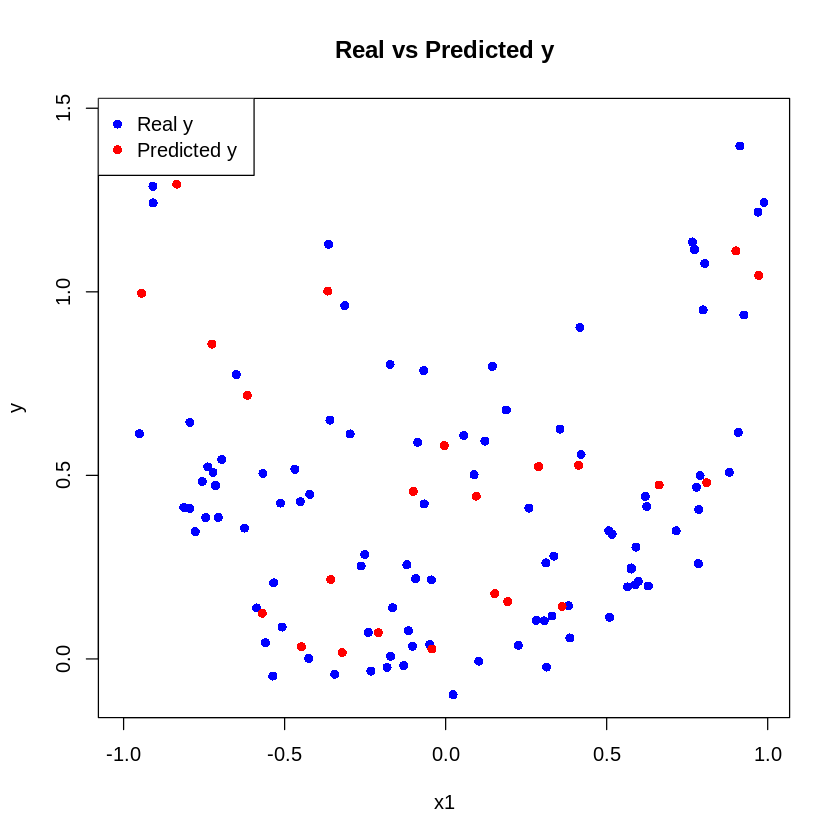

In [109]:
# Scatter plot of real y vs predicted y with respect to x1
plot(x1, y, col = "blue", pch = 16, xlab = "x1", ylab = "y", main = "Real vs Predicted y")
points(new_x1, pred_y, col = "red", pch = 16)
legend("topleft", legend = c("Real y", "Predicted y"), col = c("blue", "red"), pch = 16)

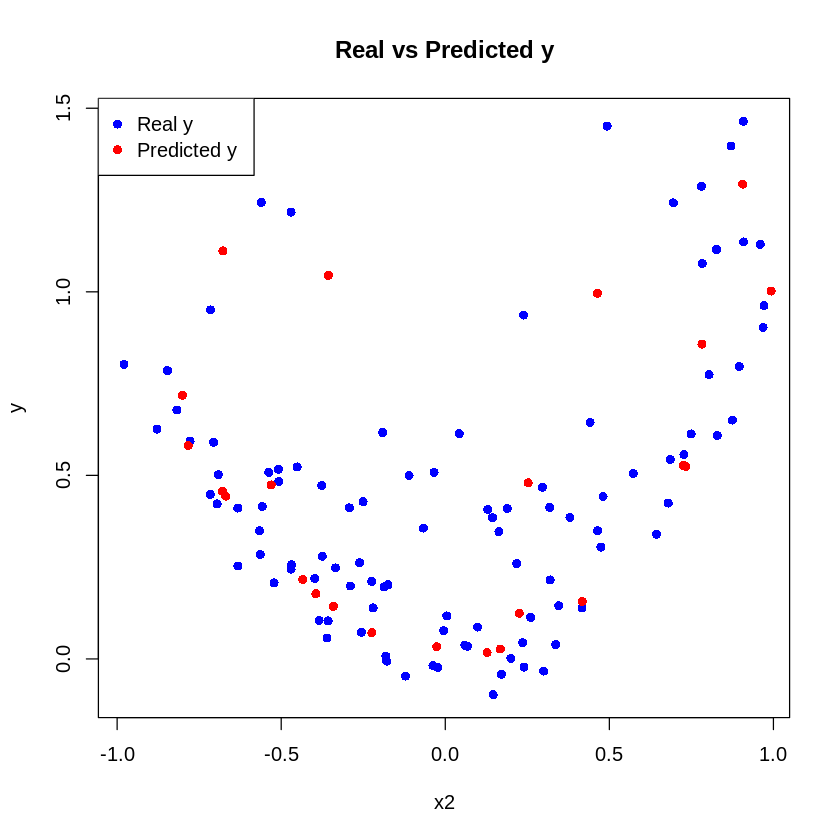

In [110]:
# Scatter plot of real y vs predicted y with respect to x2
plot(x2, y, col = "blue", pch = 16, xlab = "x2", ylab = "y", main = "Real vs Predicted y")
points(new_x2, pred_y, col = "red", pch = 16)
legend("topleft", legend = c("Real y", "Predicted y"), col = c("blue", "red"), pch = 16)